# Predicting Bikeshare Demand

## Introduce the Bikeshare Data Set
---

I will be working with a dataset from Capital Bikeshare, which was used in a Kaggle Competition. 
https://www.kaggle.com/c/bike-sharing-demand/data

The objective of this competition was to predict the total ridership of Capital Bikeshare in any given hour.  

Forecasting demand is a common practice in real world data science application.  If we can predict demand of a product, we can create tools to improve their system, in this case bikeshares.  
Some real world applications would be: 
* Determine where to build next new bikeshare station, and how large of a station to build
* Calculate expected wear and tear of bike on bikeshare



In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [60]:
data = 'C:\\Users\\606569\\Documents\\GitHub\\201\\Project_2\\data\\bikeshare.csv'
bikes = pd.read_csv(data, index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Note that we used `index_col` to set our index or primary key as the 'datetime' column for our data.  So each row will be a set to the value of the 'datetime' field

We also use pandas to parse dates.  (if `parse_dates = True` ,for the infex only)  So rather than reading in a string, it converts the index to a `datetime` object

**Each observation (row) is an hour of events**

| Variable| Description |
|---------|----------------|
|datetime| hourly date + timestamp  |
|season|  1=winter, 2=spring, 3=summer, 4=fall |
|holiday| whether the day is considered a holiday|
|workingday| whether the day is neither a weekend nor holiday|
|weather| See Below|
|temp| temperature in Celsius|
|atemp| "feels like" temperature in Celsius|
|humidity| relative humidity|
|windspeed| wind speed|
|casual| number of non-registered user rentals initiated|
|registered| number of registered user rentals initiated|
|count| number of total rentals|

> _Details on Weather Variable_

> **1**: Clear, Few clouds, Partly cloudy, Partly cloudy

> **2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

> **3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

> **4**: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

They are a total of 11 features, and 1 response variable.  
The responsible variable is the `count` column, which looks at total ridership.  

In [61]:
# Use the .rename() method to rename count to total.
bikes.rename(columns={'count':'total_rentals'}, inplace=True) 
# "count" is a method in Pandas (and a very non-specific name)
# so it's best to name that column something else.

## Visualizing the Data
---

It's always important to have a general "feel" of the data before building a model.  Ideally, before building your model, you want to have some sense of which variables matter the most for predict your response variable.  

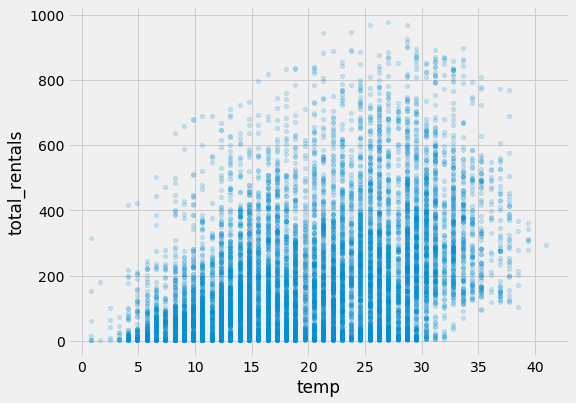

In [62]:
# Pandas scatterplot
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);

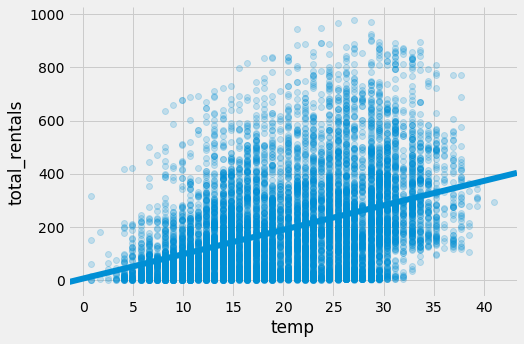

In [63]:
# Seaborn scatterplot with regression line
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

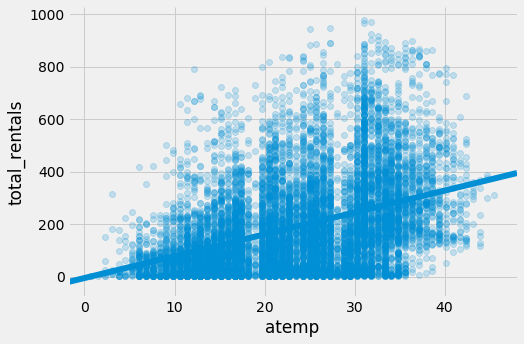

In [64]:
# Seaborn scatterplot with regression line
sns.lmplot(x='atemp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

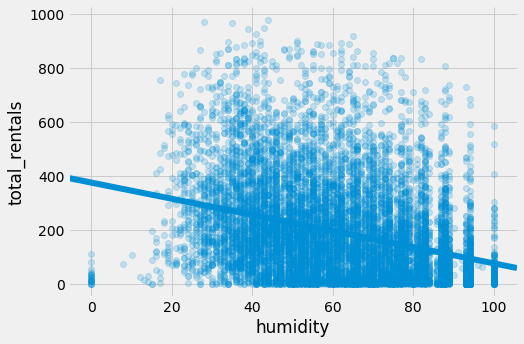

In [65]:
# Seaborn scatterplot with regression line
sns.lmplot(x='humidity', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

## Building a Regression Model 
---

#### Create a feature matrix called "X" that holds a `DataFrame` with only the "temp" variable and a `Series` called y that has the "total_rentals" column.

In [66]:
# Create X and y.
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total_rentals

In [67]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [68]:
# Check X's shape (n = number of observations, p = number of features).
print((X.shape))

(10886, 1)


In [69]:
# Check y's shape (single dimension with length n).
# The comma indicates the datatype is a tuple.
print((y.shape))

(10886,)


## SciKit-Learn Four Step Modeling Pattern

**Step 1:** Import the class you plan to use.

In [70]:
from sklearn.linear_model import LinearRegression

**Step 2:** "Instantiate" the "estimator."
- Estimator is scikit-learn's term for model
- Instantiate means to 'make an instance of'

In [71]:
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

**Step 3:** Fit the model with data (aka "model training").

In [72]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Once a model has been fit with data, it's called a "fitted model."

**Step 4:** Predict the response for a new observation.

- New observations are called "out-of-sample" data.
- Uses the information it learned during the model training process.

In [73]:
# Per future warning, one-dimensional arrays must be reshaped using the following.
lr.predict(np.array([0]).reshape(1,-1))

array([6.04621296])

- Returns a NumPy array, and we keep track of what the numbers "mean."
- Can predict for multiple observations at once.

Let's make 2 predictions, one when the `temp` is 0 and another when the `temp` is 10. 
- To do this, our feature matrix is a 2-D array where each row is a list of features. Since we only have a single feature, the temperature, each row will contain only a single value.

In [74]:
X_new = [[0], [10]]
lr.predict(X_new)

array([ 6.04621296, 97.75161777])

**What we just predicted using our model is:**
- If the temperature is 0 degrees, the total number of bike rentals will be ~6.046
- If the temperature is 10 degrees the total number of bike rentals will ~97.751."

## Build a Linear Regression Model
---

#### Instantiate and fit a `LinearRegression` model on X and y from the `linear_model` section of scikit-learn.

In [75]:
# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Intercept and coefficients of the linear model.

In [76]:
# Print the coefficients.
print(f"The intercept is {linreg.intercept_}")
print(f"The coefficient is {linreg.coef_}")

The intercept is 6.04621295961681
The coefficient is [9.17054048]


In [77]:
print(f"The accuracy of our model is {linreg.score(X, y)}")

The accuracy of our model is 0.15559367802794855


## Using the Model for Prediction 

**How many bike rentals would we predict if the temperature was 25 degrees Celsius?**

In [78]:
# Manually calculate the prediction.
linreg.intercept_ + linreg.coef_*25

array([235.309725])

In [79]:
# Use the predict method.
linreg.predict(np.array([25]).reshape(1,-1))

array([235.309725])

## Working with Multiple Features 
---

- We've shown simple linear regression with only 1 feature.  
- One of the benefits of modeling is being able to choose hundrds of features at once.  
- Here we will use 4 features

### Visuializing the Data (Part 2)
- We again want to visuialize our data to get a better 'feel' for it before we begin to model

In [80]:
# Create feature column variables
feature_cols = ['temp', 'season', 'weather', 'humidity']

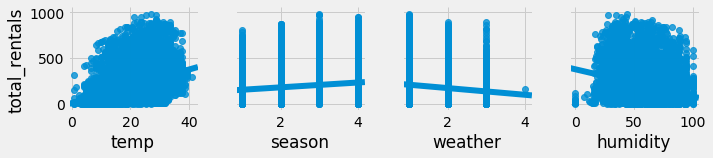

In [81]:
# Multiple scatterplots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg');

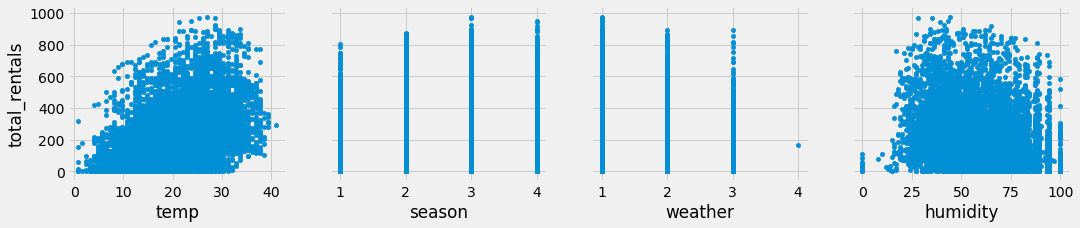

In [82]:
# Multiple scatterplots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total_rentals', ax=axs[index], figsize=(16, 3))

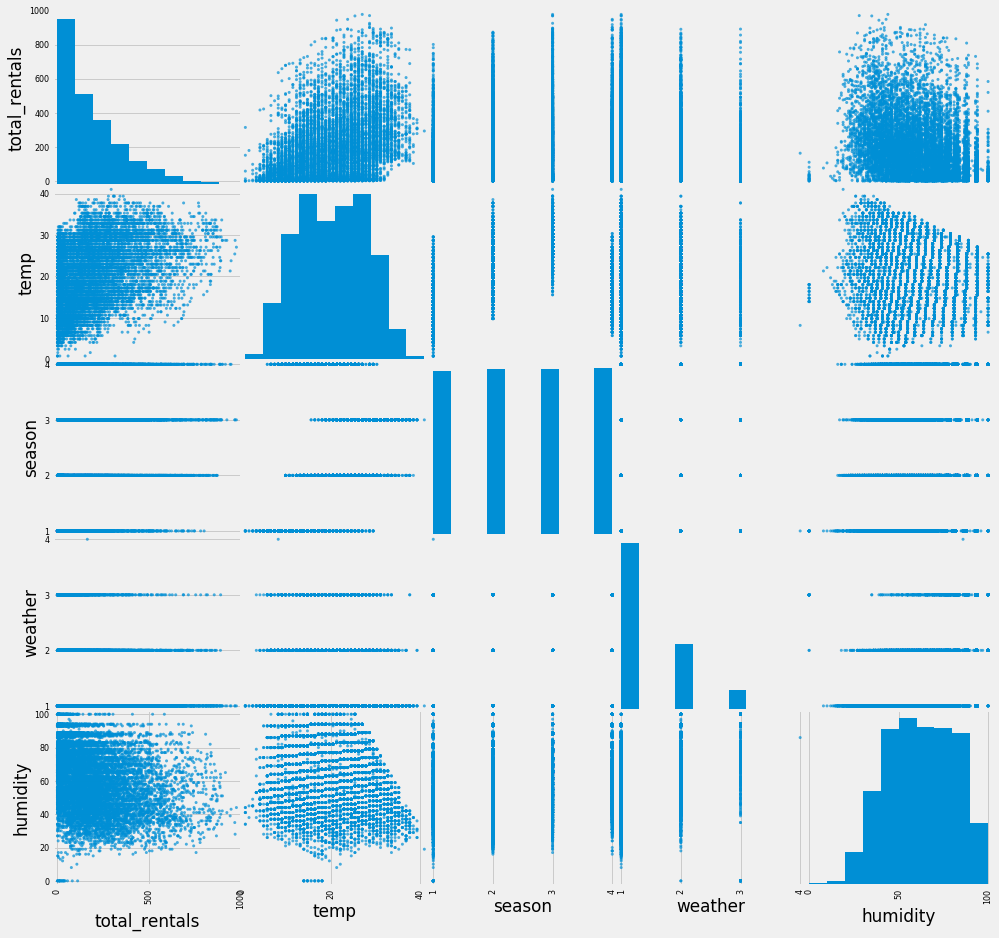

In [83]:
# alternative way in Pandas (might take a while)
# scatter_matrix does a pairplot of every column

grr = pd.plotting.scatter_matrix(bikes[['total_rentals'] + feature_cols], figsize=(15, 15), alpha=0.7)

<Figure size 864x720 with 0 Axes>

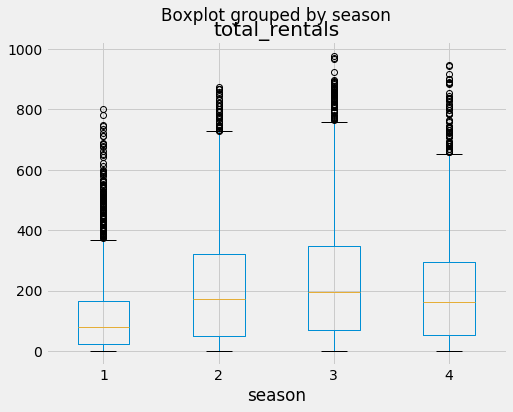

In [84]:
# Box plot of rentals, grouped by season.
plt.figure(figsize = (12, 10))
bikes.boxplot(column='total_rentals', by='season');

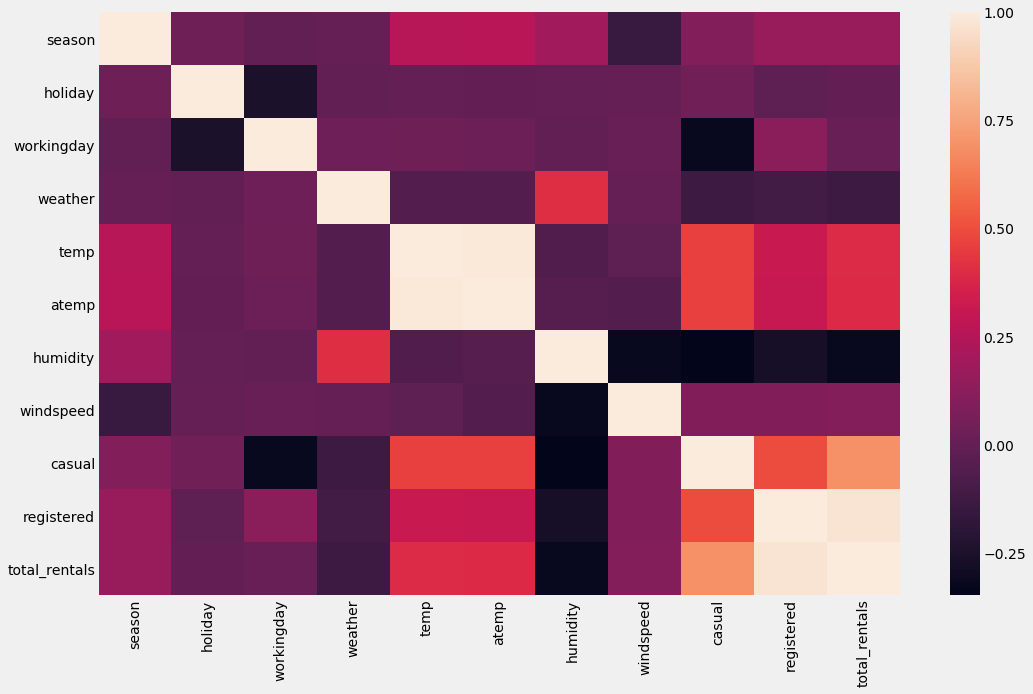

In [85]:
# Visualize correlation matrix in Seaborn using a heat map.
plt.figure(figsize = (16, 10))
sns.heatmap(bikes.corr())

**Some relationships that we can notice are**

- We tend to have increased ridership with increased temperatures
- We tend to have increased ridership with decreased humidity

### Adding more features to the model

In [86]:
# Create a list of features.
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [87]:
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(f"The intercept is {linreg.intercept_}")
print(f"The coefficient is {linreg.coef_}")

The intercept is 159.52068786129772
The coefficient is [ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [88]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

[('temp', 7.864824992477442),
 ('season', 22.53875753246678),
 ('weather', 6.670302035923743),
 ('humidity', -3.1188733823964956)]

**Interperting the coefifficients:** 

**Holding all other features fixes**
- 1-unit increase in temperature is associated with a rental increase of 7.86 bikes.
- 1-unit increase in season is associated with a rental increase of 22.5 bikes.
- 1-unit increase in weather is associated with a rental increase of 6.67 bikes.
- 1-unit increase in humidity is associated with a rental decrease of 3.12 bikes.

# Train Test Split
---

In [89]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [90]:
# Import libraries
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [91]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

X = bikes[feature_cols]
y = bikes.total_rentals
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 4) (8708,)
(2178, 4) (2178,)


In [92]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [93]:
predictions[0:5]

array([109.13737469, 223.47099187, 178.80116403, 149.88418058,
       268.76283753])

**We're fitting the model on the training data and trying to predict the test data.  Here we took a look at the first 5 predictions**

### Plotting the Model

Text(0, 0.5, 'Predictions')

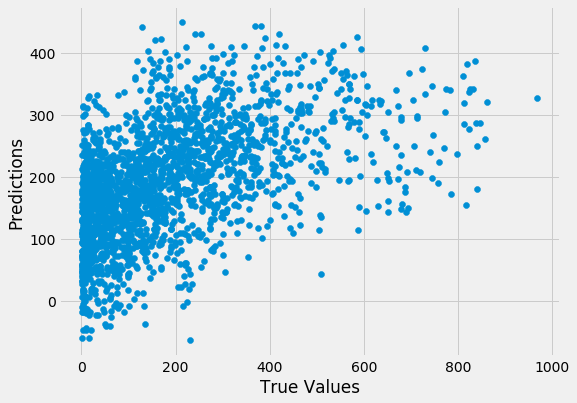

In [94]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

(array([ 26.,  64., 208., 349., 493., 458., 281., 187.,  87.,  25.]),
 array([-64.33246952, -12.95495177,  38.42256598,  89.80008373,
        141.17760148, 192.55511923, 243.93263698, 295.31015473,
        346.68767249, 398.06519024, 449.44270799]),
 <a list of 10 Patch objects>)

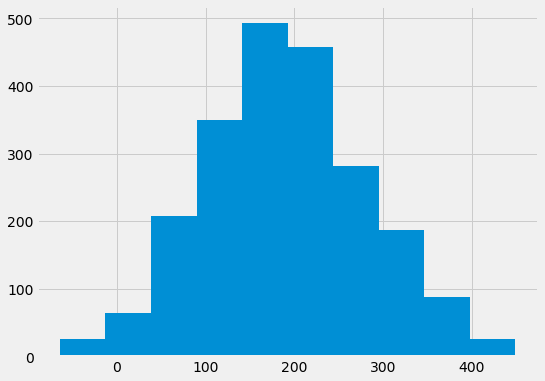

In [95]:
plt.hist(predictions)

In [96]:
model.score(X_test, y_test)

0.257852454611446

In [97]:
print(f"Model Score: {model.score(X_test, y_test)}")

Model Score: 0.257852454611446


In [98]:
pred_val = bikes.total_rentals[0:2178]
true_val = predictions
residual = true_val - pred_val

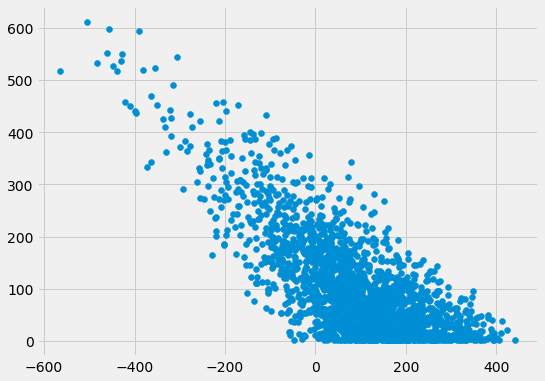

In [99]:
plt.scatter(residual, pred_val)

(array([  3.,  13.,  19.,  66., 173., 407., 649., 576., 226.,  46.]),
 array([-565.02921994, -464.33559944, -363.64197894, -262.94835844,
        -162.25473794,  -61.56111744,   39.13250307,  139.82612357,
         240.51974407,  341.21336457,  441.90698507]),
 <a list of 10 Patch objects>)

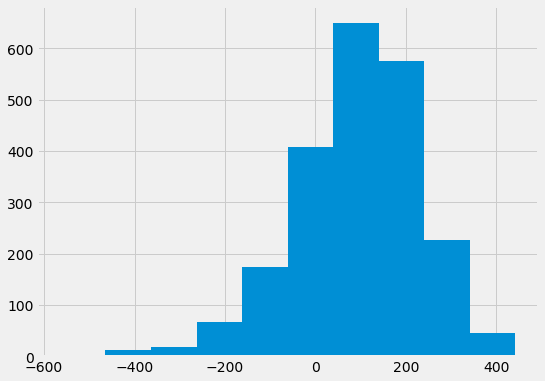

In [100]:
plt.hist(residual)

## Categorical Data 
---

In [101]:
season_dummies = pd.get_dummies(bikes.season, prefix='season')


In [102]:

# Print five random rows.
season_dummies.sample(n=5, random_state=1)


,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


In [103]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

In [104]:
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In [105]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
bikes_dummies = pd.concat([bikes, season_dummies], axis=1)

# Print five random rows.
bikes_dummies.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [106]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575786),
 ('season_2', -3.3905430997179926),
 ('season_3', -41.73686071317081),
 ('season_4', 64.41596146824205),
 ('humidity', -2.819481636259649)]

In [110]:
linreg.score(X, y)

0.2742225717066952

# StatsModels Library
---

You can also use the `StatsModels` library for machine learning, however`SciKit-Learn` provides more efficient models

In [111]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [112]:
bikes = pd.read_csv('data/bikeshare.csv')

In [113]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [114]:
xvars = ['holiday', 'workingday', 'temp', 'humidity', 'windspeed']
X = bikes[xvars]
y = bikes['count']

In [115]:
ols = sm.OLS(y, X)

In [116]:
model = ols.fit()

In [117]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              3647.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:44:40   Log-Likelihood:                         -70774.
No. Observations:               10886   AIC:                                  1.416e+05
Df Residuals:                   10881   BIC:                                  1.416e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------